# Introduction

In this notebook we demonstrate the use of **LDA (Latent Dirichlet Allocation)** generative statistical model for Information Retrieval technique to make trace link recovery between Test Cases and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made

# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.models.model_hyperps import LDA_Model_Hyperp
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler
from modules.utils import tokenizers as tok

from sklearn.feature_extraction.text import TfidfVectorizer

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Running LDA Model - Exp-Vol UNION Oracle

In [4]:
models_runner_1 = Feat_BR_Models_Runner()

#lda_hyperps = {
#            LDA_Model_Hyperp.LDA_MODEL_N_COMPONENTS.value: 50,
#            LDA_Model_Hyperp.LDA_MODEL_RANDOM_STATE.value : 2,
#           LDA_Model_Hyperp.VECTORIZER_NGRAM_RANGE.value: (1,1),
#            LDA_Model_Hyperp.VECTORIZER.value : TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True),
#            LDA_Model_Hyperp.VECTORIZER_TOKENIZER.value : tok.PorterStemmerBased_Tokenizer(),
#            LDA_Model_Hyperp.SIMILARITY_MEASURE.value : sm.SimilarityMeasure.EUCLIDIAN_DISTANCE
#}

lda_model_1 = models_runner_1.run_lda_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

lda_eval_t1 = evaluator_1.evaluate_model(model=lda_model_1, top_value=1, sim_threshold=sim_thresh)
lda_eval_t3 = evaluator_1.evaluate_model(model=lda_model_1, top_value=3, sim_threshold=sim_thresh)
lda_eval_t5 = evaluator_1.evaluate_model(model=lda_model_1, top_value=5, sim_threshold=sim_thresh)
lda_eval_t10 = evaluator_1.evaluate_model(model=lda_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LDA model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


# Similarity Matrix

In [6]:
aux_functions.highlight_df(lda_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.755236,0.679848,0.856535,0.820515,0.0455641,0.865841,0.420307,0.811539,0.0455641,0.617485,0.957183,0.926325,0.652498,0.0455641
windows_child_mode,0.187048,0.229465,0.155737,0.169401,0.051635,0.11055,0.141598,0.152705,0.051635,0.223243,0.103762,0.121664,0.328572,0.051635
apz_async_scrolling,0.0437462,0.0395984,0.113532,0.0441453,0.996442,0.110713,0.0611444,0.0425912,0.996442,0.0506544,0.0372151,0.0378256,0.0474367,0.996442
browser_customization,0.0793588,0.107328,0.075069,0.0794933,0.0696495,0.0778086,0.106566,0.0818395,0.0696495,0.0863657,0.0676317,0.06989,0.284001,0.0696495
pdf_viewer,0.171189,0.20882,0.0635838,0.166278,0.0603258,0.0653852,0.74104,0.186301,0.0603258,0.0742764,0.0573305,0.140837,0.65262,0.0603258
context_menu,0.878489,0.9162,0.79058,0.823974,0.0585109,0.59989,0.493261,0.755266,0.0585109,0.956842,0.619726,0.682959,0.604614,0.0585109
w10_comp,0.75606,0.680761,0.857187,0.821265,0.0467319,0.8666,0.42189,0.812462,0.0467319,0.618455,0.957585,0.926827,0.653715,0.0467319
tts_in_desktop,0.0535914,0.0792715,0.0505318,0.0539179,0.0497223,0.426505,0.0737048,0.324547,0.0497223,0.0605313,0.0456238,0.046689,0.108572,0.0497223
tts_in_rm,0.137117,0.179865,0.0700308,0.134459,0.0688641,0.364282,0.495245,0.357168,0.0688641,0.0838511,0.0632274,0.1142,0.469755,0.0688641


# Analysis of BR x Feat Generated Traces

In [5]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_lda_t1_m',
                                                                   'Features_IDs_lda_t3_m',
                                                                   'Features_IDs_lda_t5_m',
                                                                   'Features_IDs_lda_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[lda_eval_t1['trace_links_df'],
                                                                    lda_eval_t3['trace_links_df'],
                                                                    lda_eval_t5['trace_links_df'],
                                                                    lda_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_lda_t1',
                                                                        'f_names_lda_t3',
                                                                        'f_names_lda_t5',
                                                                        'f_names_lda_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_lda_t1_m',
                                                                       'Features_IDs_lda_t3_m',
                                                                       'Features_IDs_lda_t5_m',
                                                                       'Features_IDs_lda_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lda_t1_m,Features_IDs_lda_t3_m,Features_IDs_lda_t5_m,Features_IDs_lda_t10_m,Features_IDs_orc,f_names_lda_t1,f_names_lda_t3,f_names_lda_t5,f_names_lda_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,10,1 7 10,1 3 6 7 10,1 2 3 5 6 7 10 11 12 17,6,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [apz_async_scrolling], [co...","[[new_awesome_bar], [windows_child_mode], [apz...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,10,1 7 10,1 2 6 7 10,1 2 3 5 6 7 10 11 17 19,4,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,10,1 7 10,1 6 7 10 12,1 2 3 4 5 6 7 10 12 15,,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,10,1 7 10,1 3 6 7 10,1 2 3 5 6 7 10 11 17 19,1,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [apz_async_scrolling], [co...","[[new_awesome_bar], [windows_child_mode], [apz...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,10,1 7 10,1 2 6 7 10,1 2 4 5 6 7 10 11 15 16,,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,10,1 7 10,1 2 6 7 10,1 2 3 5 6 7 8 10 11 17,3,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,14,5 14 18,5 11 14 17 18,5 6 7 10 11 13 14 17 18 19,,[[zoom_indicator]],"[[pdf_viewer], [zoom_indicator], [indicator_de...","[[pdf_viewer], [video_and_canvas_render], [zoo...","[[pdf_viewer], [context_menu], [w10_comp], [we...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,10,1 7 10,1 5 6 7 10,1 2 5 6 7 10 11 13 17 19,3,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [pdf_viewer], [context_men...","[[new_awesome_bar], [windows_child_mode], [pdf...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,10,1 7 10,1 2 6 7 10,1 2 4 5 6 7 10 11 15 16,,[[webgl_comp]],"[[new_awesome_bar], [w10_comp], [webgl_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating LDA Model ----- 


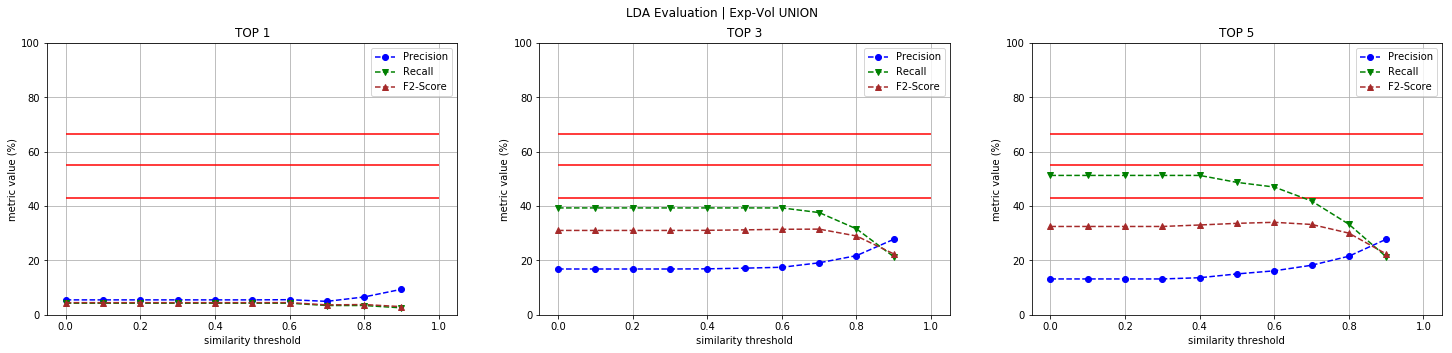

In [6]:
results_1 = evaluator_1.run_evaluator(models=[lda_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='LDA Evaluation | Exp-Vol UNION', results=results_1, model_name='lda')

## Intersection Strategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Evaluating LDA Model ----- 


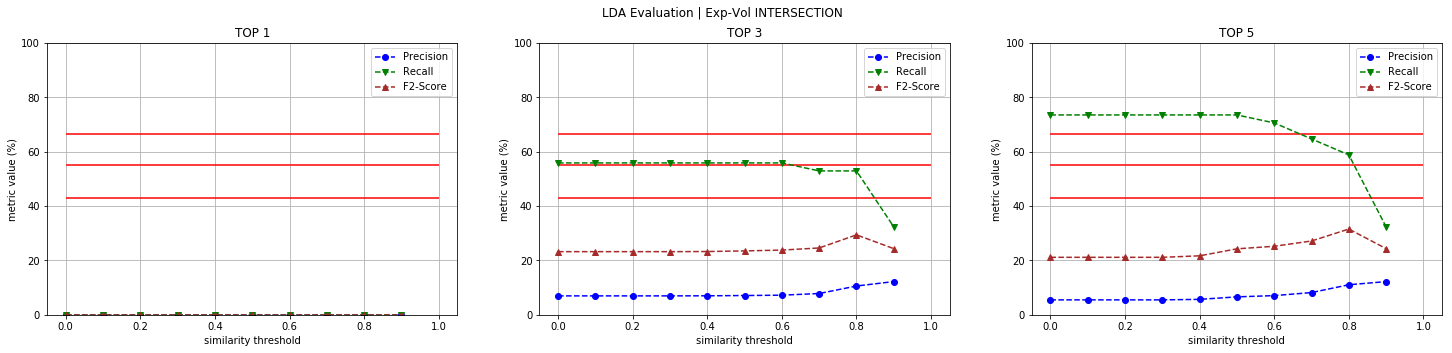

In [7]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results_2 = evaluator_2.run_evaluator(models=[lda_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='LDA Evaluation | Exp-Vol INTERSECTION', results=results_2, model_name='lda')

## Expert-Only Strategy

Feat_BR Expert Matrix shape: (91, 19)
Evaluating LDA Model ----- 


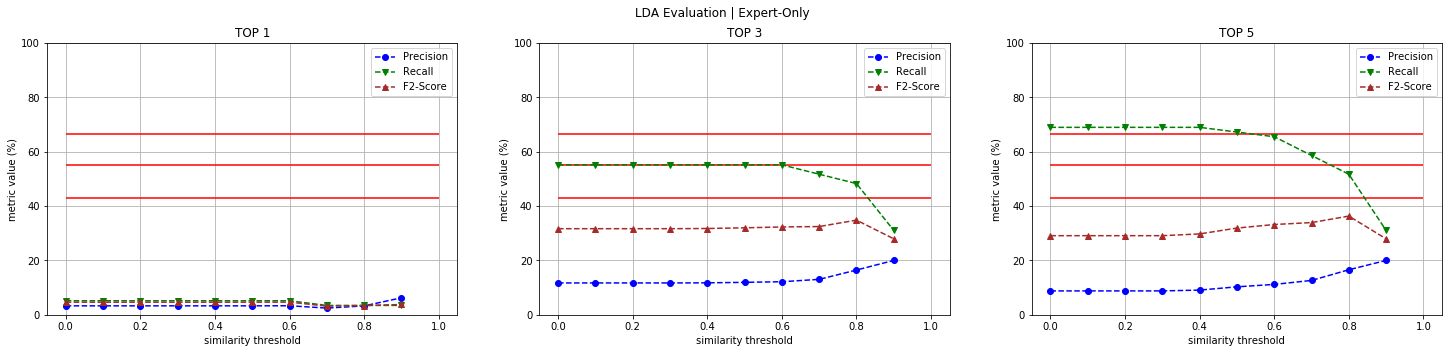

In [8]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results_3 = evaluator_3.run_evaluator(models=[lda_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='LDA Evaluation | Expert-Only', results=results_3, model_name='lda')

## Volunteers-Only Strategy

Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating LDA Model ----- 


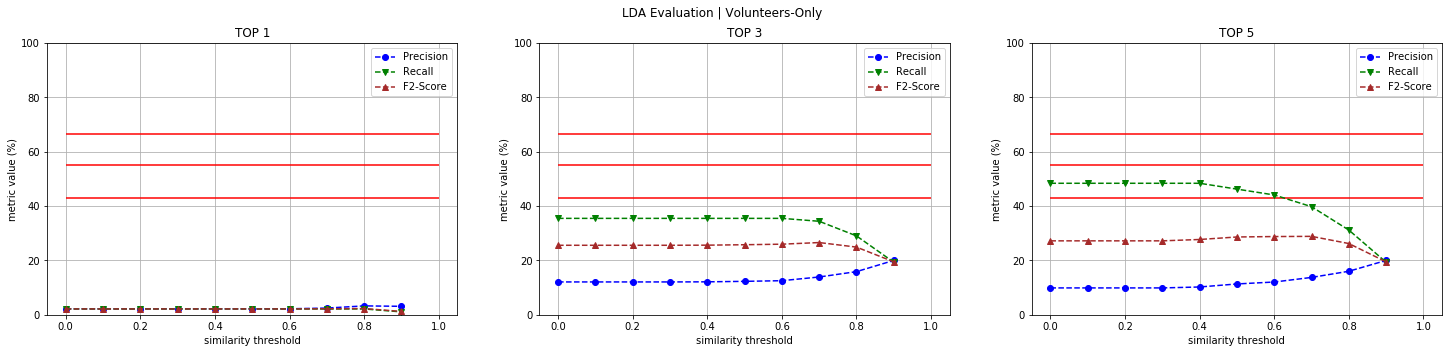

In [9]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results_4 = evaluator_4.run_evaluator(models=[lda_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='LDA Evaluation | Volunteers-Only', results=results_4, model_name='lda')

# Analysis of False Positives

# Analysis of False Negatives